In [1]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680541 sha256=56541d20dda922f00ae978ced8b942c73b7de4f3dc566abd4f38ce264e3ce7d8
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-8o3ur0mk/kobert-tokenizer_e20c13b0ebb942aaa62a378ebcde61d7
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-8o3ur0mk/kobert-tokenizer_e20c13b0ebb942aaa62a378ebcde61d7
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=6a9c8fa24f9cb9f1aa67773f269c1977bbb2a7f40eaa7a66846fbf3a3982d8af
  Stored in directory: /tmp/pip-ephem-wheel-cache-xwerlvku/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-gsu37ahj
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-gsu37ahj
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
# data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data_path = '/content/drive/MyDrive/에이블스쿨/미니프로젝트_4차/dataset/train.csv'
data = pd.read_csv(data_path)

In [24]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [25]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [26]:
# Setting parameters
max_len = 200
batch_size = 64
warmup_ratio = 0.1
num_epochs = 1000
max_grad_norm = 1
log_interval = 10
learning_rate =  5e-5

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [28]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [29]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [30]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [31]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5,  shuffle=True)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [32]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 layer_norm=None, # 마지막 layer norm
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        self.layer_norm = layer_norm
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
        if layer_norm:
            self.layer_norm = nn.LayerNorm(hidden_size)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.layer_norm:
            pooler = self.layer_norm(pooler)
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [33]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.5, layer_norm=True).to(device)

# # 전체 Freeze
# for param in model.parameters():
#     param.requires_grad = False

# trainable = False
# for name, param in model.named_parameters():
#     if name == 'bert.encoder.layer.10.attention.self.query.weight': # 10번 째 블록부터 trainable
#         trainable = True
#     param.requires_grad = True

# for name, param in model.named_parameters():
#     if name.split('.')[-2] == 'LayerNorm': # LayerNorm 은 모두 학습 시키기
#         param.requires_grad = True
    
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [34]:
# Early Stopping
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
best_acc = 0
patience_limit = 10 # 몇 번의 epoch까지 지켜볼지를 결정
patience_check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

train_history=[]
val_history=[]
train_loss_history=[]
val_loss_history=[]
for e in range(num_epochs):
    train_acc, train_loss = 0.0, 0.0
    val_acc, val_loss = 0.0, 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_loss += loss.data.cpu().numpy()
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            # train_history.append(train_acc / (batch_id+1))
            # train_loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train loss {}".format(e+1, train_loss / (batch_id+1)))
    train_history.append(train_acc / (batch_id+1))
    train_loss_history.append(train_loss / (batch_id+1))
    
    model.eval()
    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            val_acc += calc_accuracy(out, label)
            val_loss += loss_fn(out, label).data.cpu().numpy()
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    print("epoch {} val loss {}".format(e+1, val_loss / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))
    val_loss_history.append(val_loss / (batch_id+1))

    # ### early stopping 여부를 체크하는 부분 ###
    # if val_acc < best_acc: # acc 개선되지 않은 경우
    #     patience_check += 1
    #     if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
    #         break
    # else: # acc가 개선된 경우
    #     best_acc = val_acc
    #     patience_check = 0

    ### early stopping 여부를 체크하는 부분 ###
    if val_loss > best_loss: # loss가 개선되지 않은 경우
        patience_check += 1
        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break
    else: # loss가 개선된 경우
        best_loss = val_loss
        patience_check = 0

  0%|          | 0/42 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.4234451055526733 train acc 0.390625
epoch 1 batch id 11 loss 1.5326488018035889 train acc 0.32670454545454547
epoch 1 batch id 21 loss 1.356001615524292 train acc 0.34598214285714285
epoch 1 batch id 31 loss 1.3551502227783203 train acc 0.3558467741935484
epoch 1 batch id 41 loss 1.257089376449585 train acc 0.3711890243902439
epoch 1 train acc 0.3745328073089701
epoch 1 train loss 1.4468958235922313


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 val acc 0.4733231707317073
epoch 1 val loss 1.3038866996765137


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.3695122003555298 train acc 0.46875
epoch 2 batch id 11 loss 1.211195468902588 train acc 0.5056818181818182
epoch 2 batch id 21 loss 1.085708498954773 train acc 0.5290178571428571
epoch 2 batch id 31 loss 1.069007158279419 train acc 0.5665322580645161
epoch 2 batch id 41 loss 0.8373844623565674 train acc 0.5941310975609756
epoch 2 train acc 0.597703834440753
epoch 2 train loss 1.1093367792311168


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 val acc 0.7658536585365854
epoch 2 val loss 0.9660410404205322


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.803942859172821 train acc 0.84375
epoch 3 batch id 11 loss 0.764873743057251 train acc 0.7642045454545454
epoch 3 batch id 21 loss 0.7594764828681946 train acc 0.7849702380952381
epoch 3 batch id 31 loss 0.45320644974708557 train acc 0.8094758064516129
epoch 3 batch id 41 loss 0.4397884011268616 train acc 0.8285060975609756
epoch 3 train acc 0.8292670265780732
epoch 3 train loss 0.686697128982771


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 val acc 0.8207317073170731
epoch 3 val loss 0.6956501126289367


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.5992758870124817 train acc 0.84375
epoch 4 batch id 11 loss 0.5219973921775818 train acc 0.8920454545454546
epoch 4 batch id 21 loss 0.4844508469104767 train acc 0.90625
epoch 4 batch id 31 loss 0.35164400935173035 train acc 0.920866935483871
epoch 4 batch id 41 loss 0.24783675372600555 train acc 0.9302591463414634
epoch 4 train acc 0.9308122231450721
epoch 4 train loss 0.3907559726919447


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 val acc 0.8304878048780487
epoch 4 val loss 0.5944206714630127


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.23709718883037567 train acc 0.953125
epoch 5 batch id 11 loss 0.27037519216537476 train acc 0.9630681818181818
epoch 5 batch id 21 loss 0.1677864044904709 train acc 0.9627976190476191
epoch 5 batch id 31 loss 0.24242915213108063 train acc 0.9642137096774194
epoch 5 batch id 41 loss 0.14986452460289001 train acc 0.9672256097560976
epoch 5 train acc 0.9668985326688816
epoch 5 train loss 0.21446579907621657


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 val acc 0.8322408536585366
epoch 5 val loss 0.5881819188594818


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.17768052220344543 train acc 0.953125
epoch 6 batch id 11 loss 0.13593436777591705 train acc 0.9786931818181818
epoch 6 batch id 21 loss 0.1059647649526596 train acc 0.9806547619047619
epoch 6 batch id 31 loss 0.17756588757038116 train acc 0.9818548387096774
epoch 6 batch id 41 loss 0.13326075673103333 train acc 0.9817073170731707
epoch 6 train acc 0.9810354374307864
epoch 6 train loss 0.12495026418140956


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 val acc 0.8256097560975609
epoch 6 val loss 0.6364376783370972


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.1361379772424698 train acc 0.984375
epoch 7 batch id 11 loss 0.1868358850479126 train acc 0.9914772727272727
epoch 7 batch id 21 loss 0.06406495720148087 train acc 0.9888392857142857
epoch 7 batch id 31 loss 0.08428073674440384 train acc 0.9873991935483871
epoch 7 batch id 41 loss 0.03722400590777397 train acc 0.9878048780487805
epoch 7 train acc 0.9875415282392026
epoch 7 train loss 0.0802084438147999


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 val acc 0.8238567073170732
epoch 7 val loss 0.702451080083847


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.09589260816574097 train acc 0.96875
epoch 8 batch id 11 loss 0.041622258722782135 train acc 0.9900568181818182
epoch 8 batch id 21 loss 0.038375407457351685 train acc 0.9903273809523809
epoch 8 batch id 31 loss 0.024316659197211266 train acc 0.9894153225806451
epoch 8 batch id 41 loss 0.11820830404758453 train acc 0.9900914634146342
epoch 8 train acc 0.9903273809523809
epoch 8 train loss 0.05665124691135827


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 val acc 0.8127286585365854
epoch 8 val loss 0.7905413269996643


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.013733042404055595 train acc 1.0
epoch 9 batch id 11 loss 0.06900513917207718 train acc 0.9886363636363636
epoch 9 batch id 21 loss 0.059713467955589294 train acc 0.9895833333333334
epoch 9 batch id 31 loss 0.014070255681872368 train acc 0.9919354838709677
epoch 9 batch id 41 loss 0.012172497808933258 train acc 0.991234756097561
epoch 9 train acc 0.9914434523809523
epoch 9 train loss 0.039178006240122375


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 val acc 0.8144817073170731
epoch 9 val loss 0.8236116528511047


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.023772986605763435 train acc 0.984375
epoch 10 batch id 11 loss 0.014967693015933037 train acc 0.9971590909090909
epoch 10 batch id 21 loss 0.013920344412326813 train acc 0.9940476190476191
epoch 10 batch id 31 loss 0.03237781673669815 train acc 0.9939516129032258
epoch 10 batch id 41 loss 0.02322983928024769 train acc 0.9942835365853658
epoch 10 train acc 0.9944196428571429
epoch 10 train loss 0.0307459916609029


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 val acc 0.8207317073170731
epoch 10 val loss 0.8776626944541931


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.014690964482724667 train acc 1.0
epoch 11 batch id 11 loss 0.020879963412880898 train acc 0.9957386363636364
epoch 11 batch id 21 loss 0.010009857825934887 train acc 0.9970238095238095
epoch 11 batch id 31 loss 0.009832708165049553 train acc 0.9964717741935484
epoch 11 batch id 41 loss 0.009180527180433273 train acc 0.9961890243902439
epoch 11 train acc 0.9962797619047619
epoch 11 train loss 0.020838614675172028


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 val acc 0.8162347560975609
epoch 11 val loss 0.921678364276886


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.0066262041218578815 train acc 1.0
epoch 12 batch id 11 loss 0.009857543744146824 train acc 0.9957386363636364
epoch 12 batch id 21 loss 0.004973706789314747 train acc 0.9947916666666666
epoch 12 batch id 31 loss 0.08834383636713028 train acc 0.9929435483870968
epoch 12 batch id 41 loss 0.010989007540047169 train acc 0.9942835365853658
epoch 12 train acc 0.9944196428571429
epoch 12 train loss 0.02618815626816026


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 val acc 0.8252286585365853
epoch 12 val loss 0.9599667191505432


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.004242900758981705 train acc 1.0
epoch 13 batch id 11 loss 0.011482085101306438 train acc 0.9957386363636364
epoch 13 batch id 21 loss 0.015529697760939598 train acc 0.9955357142857143
epoch 13 batch id 31 loss 0.04818136990070343 train acc 0.9949596774193549
epoch 13 batch id 41 loss 0.019973838701844215 train acc 0.9954268292682927
epoch 13 train acc 0.9949820044296788
epoch 13 train loss 0.018319584723074166


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 val acc 0.8291158536585366
epoch 13 val loss 1.0800322234630584


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.00694451667368412 train acc 1.0
epoch 14 batch id 11 loss 0.004249353893101215 train acc 0.9985795454545454
epoch 14 batch id 21 loss 0.006171639077365398 train acc 0.9962797619047619
epoch 14 batch id 31 loss 0.008395160548388958 train acc 0.9969758064516129
epoch 14 batch id 41 loss 0.05256306752562523 train acc 0.9973323170731707
epoch 14 train acc 0.9962884136212625
epoch 14 train loss 0.015249311397339971


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 val acc 0.8148628048780487
epoch 14 val loss 1.067359948158264


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.005295473616570234 train acc 1.0
epoch 15 batch id 11 loss 0.012698762118816376 train acc 0.9943181818181818
epoch 15 batch id 21 loss 0.0033350817393511534 train acc 0.9962797619047619
epoch 15 batch id 31 loss 0.0021803071722388268 train acc 0.9954637096774194
epoch 15 batch id 41 loss 0.014817362651228905 train acc 0.9954268292682927
epoch 15 train acc 0.9955357142857143
epoch 15 train loss 0.014374697511638737


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 val acc 0.8099847560975609
epoch 15 val loss 1.1496699929237366


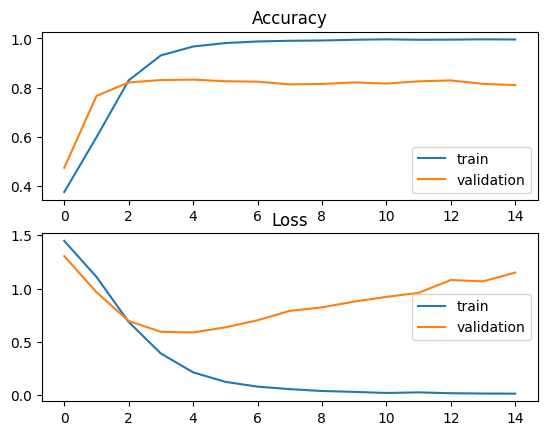

In [35]:
plt.subplot(2, 1, 1)
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(train_loss_history, label='train')
plt.plot(val_loss_history, label='validation')
plt.legend()
plt.show()

In [36]:
model.eval()
test_acc = 0.0
y_pred = []
y_test = []
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        y_test = np.hstack((y_test, label.cpu().numpy()))
        y_pred = np.hstack((y_pred, torch.max(out, 1)[1].cpu().numpy()))
print("test acc {}".format(test_acc / (batch_id+1)))

  0%|          | 0/12 [00:00<?, ?it/s]

test acc 0.8401178728070176


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[260   7  39  10   1]
 [ 12 117  12   4   2]
 [ 13   3 127   3   0]
 [  5   2   4 101   0]
 [  0   1   0   0  19]]
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       317
         1.0       0.90      0.80      0.84       147
         2.0       0.70      0.87      0.77       146
         3.0       0.86      0.90      0.88       112
         4.0       0.86      0.95      0.90        20

    accuracy                           0.84       742
   macro avg       0.84      0.87      0.85       742
weighted avg       0.85      0.84      0.84       742

0.851770103868942


In [38]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [39]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [40]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 이론


In [41]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [42]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [43]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 웹


In [44]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [45]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 이론


In [46]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 코드2


In [47]:
predict('N-Gram의 개념이 뭔가요?')

>> 분류 결과 : 이론


In [48]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [49]:
predict("원격 가능할까요,,,,,????")

>> 분류 결과 : 원격


In [54]:
# # save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
save_path = '/content/drive/MyDrive/에이블스쿨/미니프로젝트_4차/save_model/'
torch.save(model, save_path + 'v9_kobert_0.85177pt')